In [77]:
import pandas as pd

header=['label', 'text']
text = pd.read_table('train_orig.txt', header=None)
text.columns = header
print(text)
print(type(text))

        label                                               text
0           0  giuliani recalled that trump initially called ...
1           0  trump was seen yesterday on television in mcdo...
2           0  illustration newsday photo by jon naso donald ...
3           0  donald trump beats hillary clinton on li by ju...
4           0  and an outlier a pro trump painter depicting a...
...       ...                                                ...
253776     10  on tuesday trump jr the presidents eldest son ...
253777     10  hes by no definition a conservative and yet he...
253778     10  illustration photos 2 caption photo color dona...
253779     10  on a day that produced the heaviest rain in a ...
253780     10  ives challenge means rauners attempts to dista...

[253781 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [78]:
replace_dict = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2}
text['label'] = text['label'].replace(replace_dict)
print(text)

        label                                               text
0           0  giuliani recalled that trump initially called ...
1           0  trump was seen yesterday on television in mcdo...
2           0  illustration newsday photo by jon naso donald ...
3           0  donald trump beats hillary clinton on li by ju...
4           0  and an outlier a pro trump painter depicting a...
...       ...                                                ...
253776      2  on tuesday trump jr the presidents eldest son ...
253777      2  hes by no definition a conservative and yet he...
253778      2  illustration photos 2 caption photo color dona...
253779      2  on a day that produced the heaviest rain in a ...
253780      2  ives challenge means rauners attempts to dista...

[253781 rows x 2 columns]


In [10]:
text[1]

0         so i think those are three positive sort of li...
1         lighthizers role became clear to the chinese w...
2         donald trump i think will probably pursue some...
3         the consumer financial protection bureau likel...
4         full text donald trump said he wont run for pr...
                                ...                        
115350    on tuesday trump jr the presidents eldest son ...
115351    hes by no definition a conservative and yet he...
115352    illustration photos 2 caption photo color dona...
115353    on a day that produced the heaviest rain in a ...
115354    ives challenge means rauners attempts to dista...
Name: 1, Length: 115355, dtype: object

In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [42]:
train_texts, test_texts, train_labels, test_labels = train_test_split(text['text'], text['label'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_texts)

# Convert the text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences
maxlen = 100  # maximum sequence length
train_data = pad_sequences(train_sequences, maxlen=maxlen)
test_data = pad_sequences(test_sequences, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Embedding(5000, 20, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, np.array(train_labels), validation_split=0.2, epochs=10, batch_size=20)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, np.array(test_labels))
print(f'Test loss: {loss:.2f}, test accuracy: {accuracy:.2f}')

Epoch 1/10
8121/8121 [==============================] - 594s 73ms/step - loss: 0.8707 - accuracy: 0.5193 - val_loss: 0.8313 - val_accuracy: 0.5565
Epoch 2/10
8121/8121 [==============================] - 568s 70ms/step - loss: 0.8189 - accuracy: 0.5714 - val_loss: 0.8199 - val_accuracy: 0.5680
Epoch 3/10
8121/8121 [==============================] - 596s 73ms/step - loss: 0.7965 - accuracy: 0.5865 - val_loss: 0.8144 - val_accuracy: 0.5706
Epoch 4/10
8121/8121 [==============================] - 622s 77ms/step - loss: 0.7807 - accuracy: 0.6014 - val_loss: 0.8160 - val_accuracy: 0.5752
Epoch 5/10
8121/8121 [==============================] - 616s 76ms/step - loss: 0.7665 - accuracy: 0.6112 - val_loss: 0.8151 - val_accuracy: 0.5748
Epoch 6/10
8121/8121 [==============================] - 615s 76ms/step - loss: 0.7533 - accuracy: 0.6212 - val_loss: 0.8154 - val_accuracy: 0.5767
Epoch 7/10
8121/8121 [==============================] - 613s 75ms/step - loss: 0.7404 - accuracy: 0.6313 - val_loss: 0

In [43]:
model.save('First_Trail_LSTM')

INFO:tensorflow:Assets written to: First_Trail_LSTM\assets


In [45]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 20)           100000    
                                                                 
 lstm_4 (LSTM)               (None, 64)                21760     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 121,955
Trainable params: 121,955
Non-trainable params: 0
_________________________________________________________________


1587/1587 [==============================] - 17s 10ms/step
Predicted labels: [0 1 2 ... 0 0 0]
True labels: 46646     0
122361    1
196483    2
92299     0
126314    1
         ..
74588     0
186538    2
156549    2
120399    1
76343     0
Name: label, Length: 50757, dtype: int64


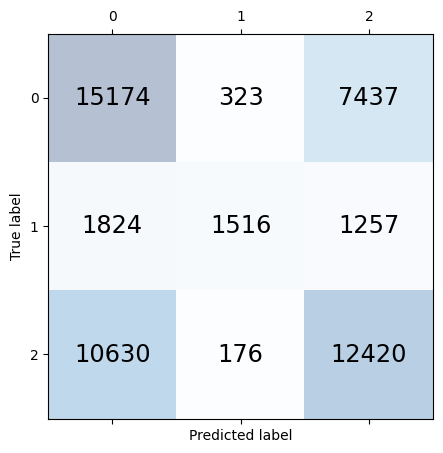

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

pred_labels = model.predict(test_data)
pred_labels = np.argmax(pred_labels, axis=1)

# Print the predicted labels and the true labels
print('Predicted labels:', pred_labels)
print('True labels:', test_labels)

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, pred_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [61]:
print(train_data)
print(train_data.shape)

[[   0    0    0 ...   17    4  276]
 [   0    0    0 ...    3    2   13]
 [   0    0    0 ...  367    1  163]
 ...
 [   0    0    0 ...   17 3430  106]
 [   0    0    0 ... 1317   11 1499]
 [   0    0    0 ...  698  331  346]]
(203024, 100)


In [65]:
train_data

array([[   0,    0,    0, ...,   17,    4,  276],
       [   0,    0,    0, ...,    3,    2,   13],
       [   0,    0,    0, ...,  367,    1,  163],
       ...,
       [   0,    0,    0, ...,   17, 3430,  106],
       [   0,    0,    0, ..., 1317,   11, 1499],
       [   0,    0,    0, ...,  698,  331,  346]])

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

In [79]:
train_texts, test_texts, train_labels, test_labels = train_test_split(text['text'], text['label'], test_size=0.2, random_state=42)


# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_texts)

# Convert the text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences
maxlen = 100  # maximum sequence length
train_data = pad_sequences(train_sequences, maxlen=maxlen)
test_data = pad_sequences(test_sequences, maxlen=maxlen)

# Define the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, np.array(train_labels), validation_split=0.2, epochs=20, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, np.array(test_labels))
print(f'Test loss: {loss:.2f}, test accuracy: {accuracy:.2f}')

Epoch 1/20
5076/5076 [==============================] - 342s 67ms/step - loss: 0.8670 - accuracy: 0.5255 - val_loss: 0.8293 - val_accuracy: 0.5613
Epoch 2/20
5076/5076 [==============================] - 342s 67ms/step - loss: 0.8142 - accuracy: 0.5762 - val_loss: 0.8200 - val_accuracy: 0.5659
Epoch 3/20
5076/5076 [==============================] - 346s 68ms/step - loss: 0.7902 - accuracy: 0.5949 - val_loss: 0.8202 - val_accuracy: 0.5655
Epoch 4/20
5076/5076 [==============================] - 344s 68ms/step - loss: 0.7710 - accuracy: 0.6080 - val_loss: 0.8164 - val_accuracy: 0.5721
Epoch 5/20
5076/5076 [==============================] - 360s 71ms/step - loss: 0.7529 - accuracy: 0.6232 - val_loss: 0.8280 - val_accuracy: 0.5712
Epoch 6/20
5076/5076 [==============================] - 359s 71ms/step - loss: 0.7368 - accuracy: 0.6343 - val_loss: 0.8300 - val_accuracy: 0.5746
Epoch 7/20
5076/5076 [==============================] - 361s 71ms/step - loss: 0.7223 - accuracy: 0.6426 - val_loss: 0